In [1231]:
import numpy as pd
import pandas as pd
import seaborn as sns

Load Data

In [1232]:
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Check Data Types

In [1233]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [1234]:
{col:titanic[col].nunique()for col in titanic if titanic[col].dtype== object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [1235]:
col = ['sex','embarked','who','embark_town','alive']
titanic[col] = titanic[col].astype('category')

In [1236]:
titanic = titanic.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

In [1237]:
titanic.dtypes

survived         int64
pclass           int64
sex               int8
age            float64
sibsp            int64
parch            int64
fare           float64
embarked          int8
class             int8
who               int8
adult_male        bool
deck              int8
embark_town       int8
alive             int8
alone             bool
dtype: object

Check Correlations

In [1238]:
titanic.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.176509,-0.338481,0.325753,-0.557080,0.295812,-0.176509,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.173511,1.000000,-0.196793,0.094035,-0.568401,0.173511,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.118492,0.131900,-0.639773,0.908578,-0.149405,0.118492,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.044830,-0.369226,0.378685,0.280328,0.174780,-0.044830,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.071480,0.083081,-0.136003,-0.253586,-0.029635,0.071480,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.043351,0.018443,-0.055682,-0.349943,0.040766,0.043351,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.230365,-0.549500,0.146290,-0.182024,0.341083,-0.230365,0.257307,-0.271832
embarked,-0.176509,0.173511,0.118492,-0.044830,0.071480,0.043351,-0.230365,1.000000,0.173511,-0.074637,0.101884,-0.090484,1.000000,-0.176509,0.056001
class,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.173511,1.000000,-0.196793,0.094035,-0.568401,0.173511,-0.338481,0.135207
who,0.325753,-0.196793,-0.639773,0.378685,-0.136003,-0.055682,0.146290,-0.074637,-0.196793,1.000000,-0.437532,0.136671,-0.074637,0.325753,0.006540


highlights:

In [1239]:
titanic.corr().style.background_gradient(cmap='Greens')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.176509,-0.338481,0.325753,-0.557080,0.295812,-0.176509,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.173511,1.000000,-0.196793,0.094035,-0.568401,0.173511,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.118492,0.131900,-0.639773,0.908578,-0.149405,0.118492,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.044830,-0.369226,0.378685,0.280328,0.174780,-0.044830,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.071480,0.083081,-0.136003,-0.253586,-0.029635,0.071480,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.043351,0.018443,-0.055682,-0.349943,0.040766,0.043351,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.230365,-0.549500,0.146290,-0.182024,0.341083,-0.230365,0.257307,-0.271832
embarked,-0.176509,0.173511,0.118492,-0.044830,0.071480,0.043351,-0.230365,1.000000,0.173511,-0.074637,0.101884,-0.090484,1.000000,-0.176509,0.056001
class,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.173511,1.000000,-0.196793,0.094035,-0.568401,0.173511,-0.338481,0.135207
who,0.325753,-0.196793,-0.639773,0.378685,-0.136003,-0.055682,0.146290,-0.074637,-0.196793,1.000000,-0.437532,0.136671,-0.074637,0.325753,0.006540


In [1240]:
titanic.corr()[['survived']].style.background_gradient(cmap='Greens')

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
embarked,-0.176509
class,-0.338481
who,0.325753


custom highlights

In [1241]:
def highlight(val,thresholds,abs_value = True):
    black, yellow , green = thresholds
    if abs_value:
        val = abs(val)

    if val > green:
        color = 'green'
    elif val > yellow:
        color = 'yellow'
    elif val > black:
        color = 'k'
    else:
        color = ''
    return 'background-color: {}'.format(color)

In [1242]:
titanic.corr().style.map(highlight, thresholds= [0,0.2,0.5])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.176509,-0.338481,0.325753,-0.557080,0.295812,-0.176509,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.173511,1.000000,-0.196793,0.094035,-0.568401,0.173511,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.118492,0.131900,-0.639773,0.908578,-0.149405,0.118492,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.044830,-0.369226,0.378685,0.280328,0.174780,-0.044830,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.071480,0.083081,-0.136003,-0.253586,-0.029635,0.071480,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.043351,0.018443,-0.055682,-0.349943,0.040766,0.043351,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.230365,-0.549500,0.146290,-0.182024,0.341083,-0.230365,0.257307,-0.271832
embarked,-0.176509,0.173511,0.118492,-0.044830,0.071480,0.043351,-0.230365,1.000000,0.173511,-0.074637,0.101884,-0.090484,1.000000,-0.176509,0.056001
class,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.173511,1.000000,-0.196793,0.094035,-0.568401,0.173511,-0.338481,0.135207
who,0.325753,-0.196793,-0.639773,0.378685,-0.136003,-0.055682,0.146290,-0.074637,-0.196793,1.000000,-0.437532,0.136671,-0.074637,0.325753,0.006540


In [1243]:
abs(titanic.corr()).style.highlight_min(axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,1.000000,0.338481,0.543351,0.077221,0.035322,0.081629,0.257307,0.176509,0.338481,0.325753,0.557080,0.295812,0.176509,1.000000,0.203367
pclass,0.338481,1.000000,0.131900,0.369226,0.083081,0.018443,0.549500,0.173511,1.000000,0.196793,0.094035,0.568401,0.173511,0.338481,0.135207
sex,0.543351,0.131900,1.000000,0.093254,0.114631,0.245489,0.182333,0.118492,0.131900,0.639773,0.908578,0.149405,0.118492,0.543351,0.303646
age,0.077221,0.369226,0.093254,1.000000,0.308247,0.189119,0.096067,0.044830,0.369226,0.378685,0.280328,0.174780,0.044830,0.077221,0.198270
sibsp,0.035322,0.083081,0.114631,0.308247,1.000000,0.414838,0.159651,0.071480,0.083081,0.136003,0.253586,0.029635,0.071480,0.035322,0.584471
parch,0.081629,0.018443,0.245489,0.189119,0.414838,1.000000,0.216225,0.043351,0.018443,0.055682,0.349943,0.040766,0.043351,0.081629,0.583398
fare,0.257307,0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.230365,0.549500,0.146290,0.182024,0.341083,0.230365,0.257307,0.271832
embarked,0.176509,0.173511,0.118492,0.044830,0.071480,0.043351,0.230365,1.000000,0.173511,0.074637,0.101884,0.090484,1.000000,0.176509,0.056001
class,0.338481,1.000000,0.131900,0.369226,0.083081,0.018443,0.549500,0.173511,1.000000,0.196793,0.094035,0.568401,0.173511,0.338481,0.135207
who,0.325753,0.196793,0.639773,0.378685,0.136003,0.055682,0.146290,0.074637,0.196793,1.000000,0.437532,0.136671,0.074637,0.325753,0.006540


In [1244]:
#Survive and alive are represent the same information with 100% correlation, so we can should drop one of them. Let's drop 'alive':
titanic.drop(columns='alive',inplace=True)

Describe

In [1245]:
titanic.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.529742,1.308642,1.210999,-0.232323,1.529742
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.800254,0.836071,0.594291,1.572556,0.800254
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000,1.000000,1.000000,-1.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,2.000000,1.000000,-1.000000,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000,2.000000,2.000000,-1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,2.000000,2.000000,6.000000,2.000000


Missing Values Check

In [1246]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alone            0
dtype: int64

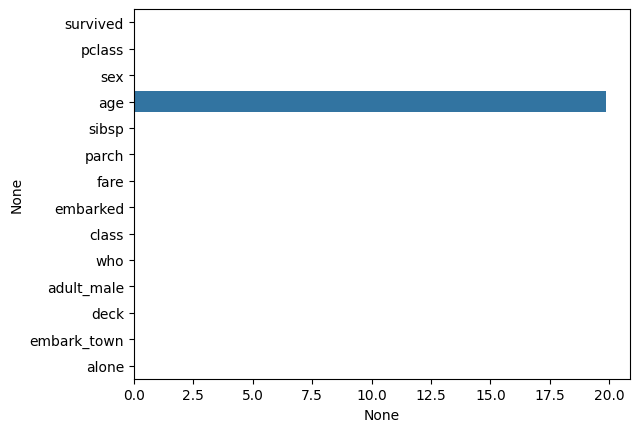

In [1247]:
ax = sns.barplot(
    x = titanic.isna().sum() / titanic.shape[0] * 100, 
    y = titanic.columns

)

Age

In [1248]:
titanic.corr()[['age']].style.background_gradient(cmap='Greens')

,age
survived,-0.077221
pclass,-0.369226
sex,0.093254
age,1.000000
sibsp,-0.308247
parch,-0.189119
fare,0.096067
embarked,-0.044830
class,-0.369226
who,0.378685


In [1249]:
titanic.groupby(['adult_male','sex']).age.mean()

adult_male  sex
False       0      27.915709
            1       5.466750
True        1      33.173123
Name: age, dtype: float64

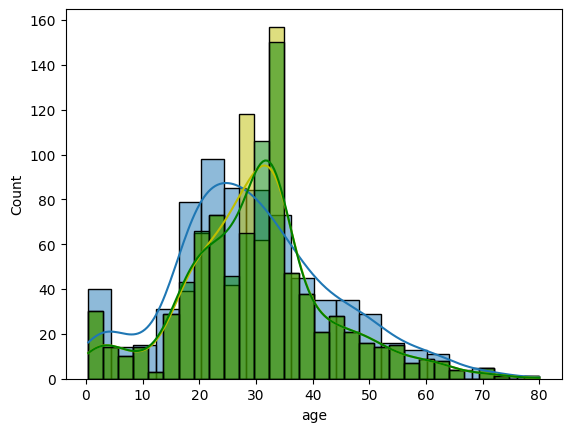

In [1230]:
titanic['age_1'] = titanic['age'].fillna(titanic.groupby(['adult_male','sex'])['age'].transform('mean'))
titanic['age_2'] = titanic['age'].fillna(titanic.groupby(['adult_male','sex','sibsp','alone'])['age'].transform('mean'))
ax = sns.histplot(titanic.age,kde=True,alpha=0.5)
ax = sns.histplot(titanic.age_1,ax=ax,color='y',alpha=0.5,kde=True)
ax = sns.histplot(titanic.age_2,ax=ax,color='g',alpha=0.5,kde=True)